# Batsman runs prediction project using Multiple Linear Regression

## importing required libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset

In [161]:
df=pd.read_csv("playerstats.csv")

In [162]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2490 non-null   int64  
 1   Player       2490 non-null   object 
 2   Span         2490 non-null   object 
 3   Mat          2490 non-null   int64  
 4   Inns         2490 non-null   int64  
 5   NO           2490 non-null   int64  
 6   Runs         2490 non-null   int64  
 7   HS           2490 non-null   object 
 8   Ave          2490 non-null   object 
 9   BF           2490 non-null   int64  
 10  SR           2490 non-null   object 
 11  100          2490 non-null   int64  
 12  50           2490 non-null   int64  
 13  0            2490 non-null   int64  
 14  Unnamed: 13  0 non-null      float64
dtypes: float64(1), int64(9), object(5)
memory usage: 291.9+ KB


In [164]:
#checking NULL values
df.isna().sum()

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
NO                0
Runs              0
HS                0
Ave               0
BF                0
SR                0
100               0
50                0
0                 0
Unnamed: 13    2490
dtype: int64

In [165]:
df.drop(columns=['Unnamed: 0','Unnamed: 13','Player'],inplace=True)

In [166]:
df.columns

Index(['Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0'],
      dtype='object')

In [167]:
df[['Start', 'End']] = df['Span'].str.split('-', expand=True)
df['Start'] = pd.to_numeric(df['Start'], errors='coerce')
df['End'] = pd.to_numeric(df['End'], errors='coerce')
df['Span'] = df['End'] - df['Start']

In [168]:
df.drop(df[['Start', 'End']],axis=1,inplace=True)

In [169]:
df.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,23,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,15,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,17,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,22,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,17,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [170]:
df.HS.head()

0    200*
1     169
2     164
3     189
4     144
Name: HS, dtype: object

In [171]:
#removing * and - in HS (high score)
df['HS'] = df['HS'].astype(str).str.replace('*', '', regex=False)
df['HS'] = df['HS'].replace('-', np.nan)

In [172]:
df.shape

(2490, 12)

In [173]:
df.dtypes

Span     int64
Mat      int64
Inns     int64
NO       int64
Runs     int64
HS      object
Ave     object
BF       int64
SR      object
100      int64
50       int64
0        int64
dtype: object

In [174]:
#converting to numerical values
columns=['HS','Ave','SR',]
for col in columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [175]:
df.dtypes

Span      int64
Mat       int64
Inns      int64
NO        int64
Runs      int64
HS        int64
Ave     float64
BF        int64
SR      float64
100       int64
50        int64
0         int64
dtype: object

In [176]:
df.describe()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
count,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2370.000000,2490.000000,2481.000000,2490.000000,2490.000000,2490.000000
mean,4.241365,37.303213,29.605622,5.496787,676.234538,47.907631,18.280996,905.231325,63.577731,0.725703,3.570281,2.474297
std,4.439131,58.960699,51.380511,9.362150,1616.848599,44.028374,12.808239,2062.373445,26.810820,2.937931,9.872351,3.843402
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,3.000000,0.000000,22.000000,12.250000,8.500000,43.000000,49.010000,0.000000,0.000000,0.000000
50%,3.000000,13.000000,10.000000,2.000000,100.500000,34.000000,16.330000,165.000000,64.230000,0.000000,0.000000,1.000000
75%,7.000000,43.000000,31.000000,6.000000,479.500000,72.000000,25.622500,671.750000,77.880000,0.000000,2.000000,3.000000
max,23.000000,463.000000,452.000000,84.000000,18426.000000,264.000000,145.000000,21367.000000,328.570000,49.000000,96.000000,34.000000


In [177]:
df.isna().sum()

Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave     120
BF        0
SR        9
100       0
50        0
0         0
dtype: int64

In [178]:
# Drop rows with missng Ave
df = df.dropna(subset=['Ave'])
# Fill missing 'SR' with median value
df['SR'] = df['SR'].fillna(df['SR'].median())

In [179]:
df.shape

(2370, 12)

## Data visualization 

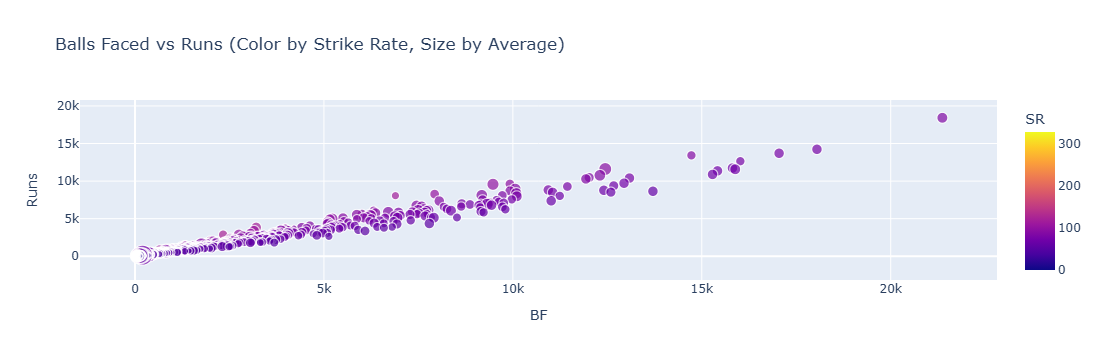

In [180]:
import plotly.express as px

fig = px.scatter(df, x='BF', y='Runs', color='SR',
                 size='Ave', hover_data=['100', '50', '0'],
                 title=' Balls Faced vs Runs (Color by Strike Rate, Size by Average)')
fig.show()

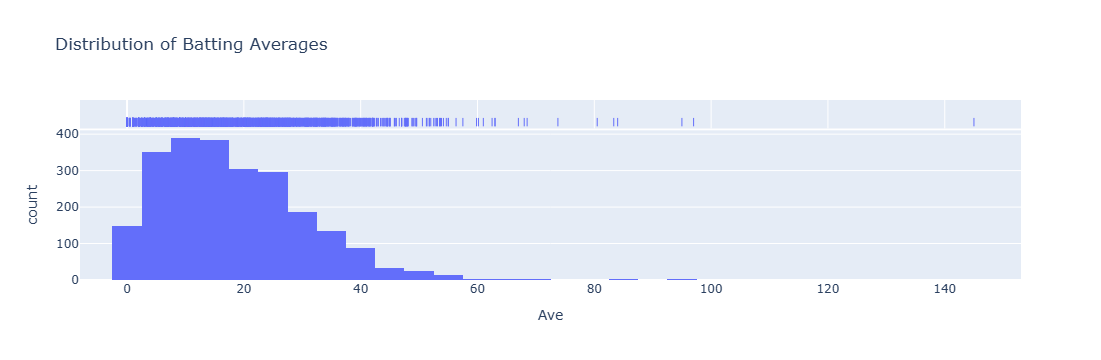

In [181]:
fig = px.histogram(df, x='Ave', nbins=50, marginal='rug',
                   title=' Distribution of Batting Averages')
fig.show()

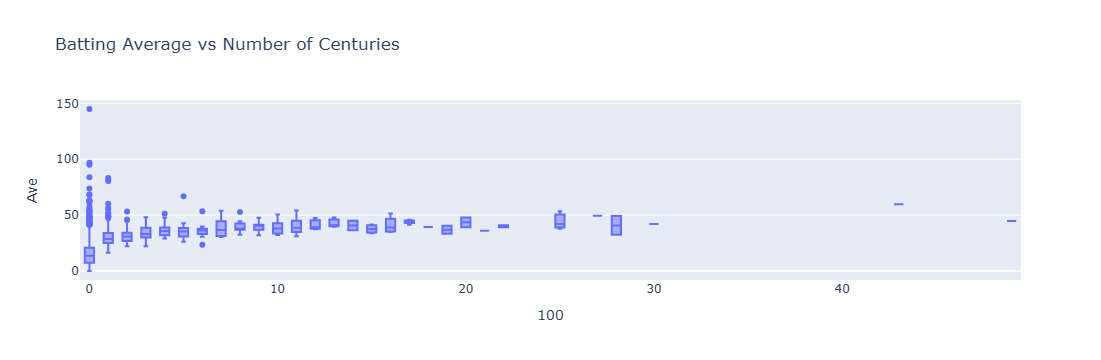

In [182]:
fig = px.box(df, x='100', y='Ave',
             title=' Batting Average vs Number of Centuries')
fig.show()

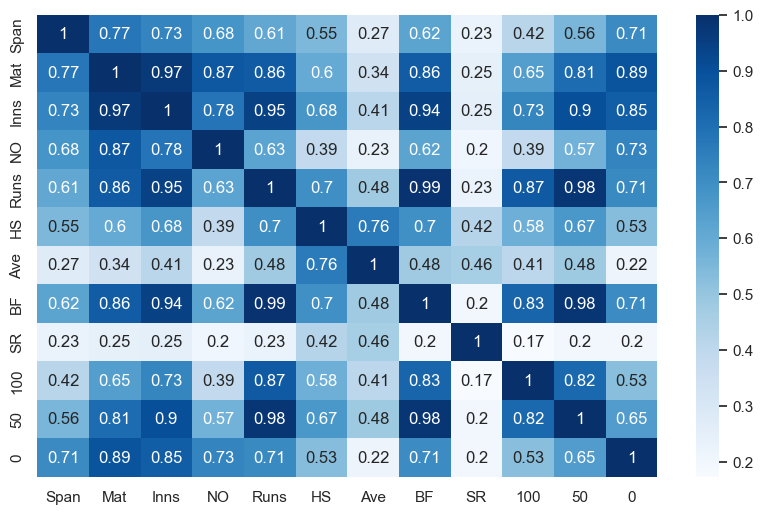

In [183]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues');

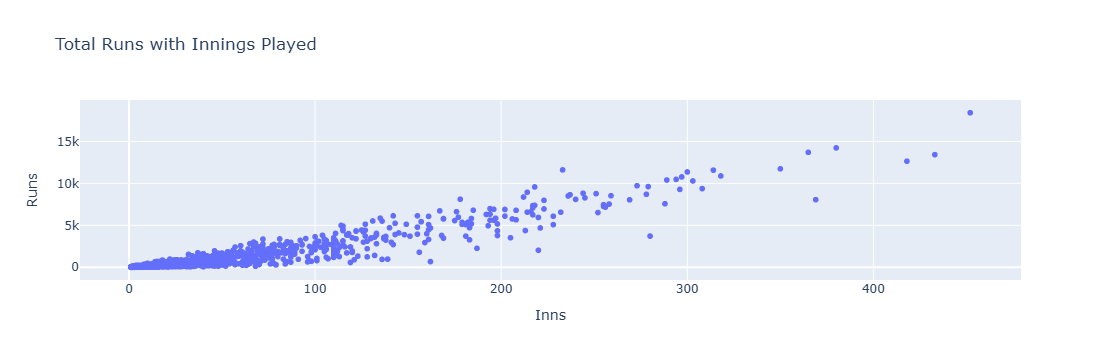

In [184]:
fig = px.scatter(df, x='Inns', y='Runs', title='Total Runs with Innings Played')
fig.show()

## Splitting the dataset

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[['Inns','NO','BF','100','50']]
y = df['Runs']

## Data preprocessing

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Training the model

## Using Random Forest Regressor

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the model
rf = RandomForestRegressor(random_state=42)
#Train the model
rf.fit(X_train_scale, y_train)

RandomForestRegressor(random_state=42)

## Predictions and Evaluation

In [190]:
y_pred = rf.predict(X_test_scale)
print("R2 Score (Basic RF):", r2_score(y_test, y_pred))
print("MSE (Basic RF):", mean_squared_error(y_test, y_pred))

R2 Score (Basic RF): 0.9892564101074862
MSE (Basic RF): 19408.123428013707


In [191]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

# Train the model using grid search
grid_search.fit(X_train_scale, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [192]:

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test_scale)
print("R2 Score (Tuned RF):", r2_score(y_test, y_pred))
print("MSE (Tuned RF):", mean_squared_error(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score (Tuned RF): 0.9893189582819846
MSE (Tuned RF): 19295.131150478417


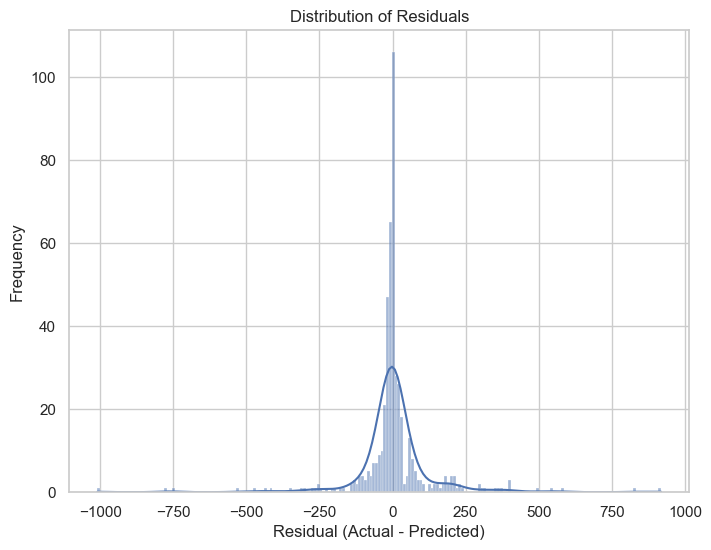

In [193]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


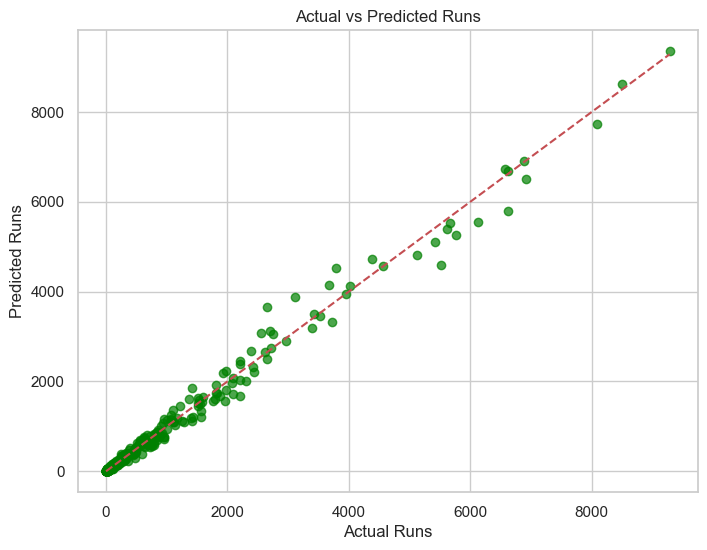

In [194]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()

## Using Linear Regression

In [196]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scale,y_train)

LinearRegression()

## Model evaluation

In [197]:
lr.score(X_test_scale,y_test)

0.9941258867241797

In [198]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test_scale)
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9941258867241797
MSE: 10611.49174790216
RMSE: 103.01209515344381


In [199]:
X_test

,Inns,NO,BF,100,50
1094,20,9,208,0,0
188,116,15,2810,1,13
1811,6,4,35,0,0
707,14,0,561,1,3
679,35,14,645,0,1
...,...,...,...,...,...
620,24,1,527,0,4
286,60,2,2155,1,12
1050,14,2,243,0,0
406,39,16,868,0,5


In [200]:
y_test

1094     141
188     2434
1811      26
707      368
679      401
        ... 
620      482
286     1530
1050     155
406      952
1270      97
Name: Runs, Length: 474, dtype: int64

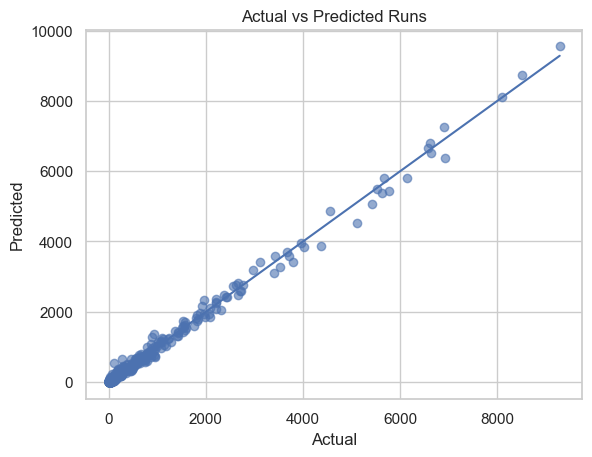

In [205]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Runs")
plt.show()

## saving the model

In [202]:
import joblib
joblib.dump(best_rf,'C:/Users/HP/mlprojects/cricket/runs_model.pkl')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
joblib.dump(scaler, "runs_scaler.pkl")

joblib.dump(scaler,'C:/Users/HP/mlprojects/cricket/runs_scaler.pkl')

['C:/Users/HP/mlprojects/cricket/runs_scaler.pkl']

In [203]:
import joblib
joblib.dump(lr,'C:/Users/HP/mlprojects/cricket/linear_model.pkl')

['C:/Users/HP/mlprojects/cricket/linear_model.pkl']